In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Support Vector Machines

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
X = pd.DataFrame(digits.data, columns = digits.feature_names)
y = pd.DataFrame(digits.target, columns = ['Target'])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

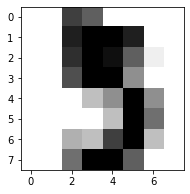

In [5]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [6]:
from sklearn.svm import SVC
model = SVC(random_state=101)
model.fit(x_train, y_train.to_numpy().ravel())

SVC(random_state=101)

In [7]:
model.score(x_test, y_test.to_numpy().ravel())

0.9861111111111112

In [12]:
grid ={
    'C' : [0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 3, 5, 7],
    'gamma' : [0.01, 1]
}
svm = SVC()

In [13]:
from sklearn.model_selection import GridSearchCV
svm_cv = GridSearchCV(svm, grid, cv=5)
svm_cv.fit(x_train, y_train.to_numpy().ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [19]:
print("best parameters: ", svm_cv.best_params_)
print("best score: ", svm_cv.best_score_)

best parameters:  {'C': 0.01, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
best score:  0.9888695315524585


In [23]:
results = pd.DataFrame(svm_cv.cv_results_)
results.sort_values(by = ['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.038575,0.001349,0.011530,0.000247,0.01,3,1,poly,"{'C': 0.01, 'degree': 3, 'gamma': 1, 'kernel':...",0.986111,0.986111,0.986063,0.993031,0.993031,0.988870,0.003398,1
45,0.038238,0.001752,0.011791,0.000744,0.1,3,1,poly,"{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': ...",0.986111,0.986111,0.986063,0.993031,0.993031,0.988870,0.003398,1
41,0.037143,0.000728,0.012211,0.000913,0.1,3,0.01,poly,"{'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel...",0.986111,0.986111,0.986063,0.993031,0.993031,0.988870,0.003398,1
77,0.037855,0.001732,0.011318,0.000555,1,3,1,poly,"{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'p...",0.986111,0.986111,0.986063,0.993031,0.993031,0.988870,0.003398,1
73,0.037382,0.000600,0.011462,0.000729,1,3,0.01,poly,"{'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel':...",0.986111,0.986111,0.986063,0.993031,0.993031,0.988870,0.003398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.194905,0.002640,0.033554,0.001660,1,7,0.01,sigmoid,"{'C': 1, 'degree': 7, 'gamma': 0.01, 'kernel':...",0.107639,0.107639,0.108014,0.108014,0.104530,0.107167,0.001329,73
54,0.257522,0.017743,0.052129,0.000494,0.1,5,1,rbf,"{'C': 0.1, 'degree': 5, 'gamma': 1, 'kernel': ...",0.107639,0.107639,0.108014,0.108014,0.104530,0.107167,0.001329,73
94,0.250589,0.002758,0.050789,0.000909,1,7,1,rbf,"{'C': 1, 'degree': 7, 'gamma': 1, 'kernel': 'r...",0.107639,0.107639,0.108014,0.108014,0.104530,0.107167,0.001329,73
95,0.169043,0.001597,0.028384,0.001701,1,7,1,sigmoid,"{'C': 1, 'degree': 7, 'gamma': 1, 'kernel': 's...",0.107639,0.107639,0.108014,0.108014,0.104530,0.107167,0.001329,73
